In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:05<00:00, 205MB/s]
100% 1.06G/1.06G [00:05<00:00, 206MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [6]:
#generators-divide the image into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize all
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)

In [19]:
from keras.layers import BatchNormalization,Dropout

In [20]:
#creating CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [25]:
history1=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 112ms/step - loss: 0.9543 - accuracy: 0.6025 - val_loss: 0.6817 - val_accuracy: 0.5786
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5751 - accuracy: 0.6991 - val_loss: 0.6785 - val_accuracy: 0.6904
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5086 - accuracy: 0.7498 - val_loss: 0.5550 - val_accuracy: 0.7286
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4413 - accuracy: 0.7855 - val_loss: 0.5086 - val_accuracy: 0.7774
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4017 - accuracy: 0.8091 - val_loss: 0.5393 - val_accuracy: 0.7502
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3483 - accuracy: 0.8327 - val_loss: 0.5259 - val_accuracy: 0.7892
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3095 - accuracy: 0.8523 - val_loss: 0.4857 - val_ac

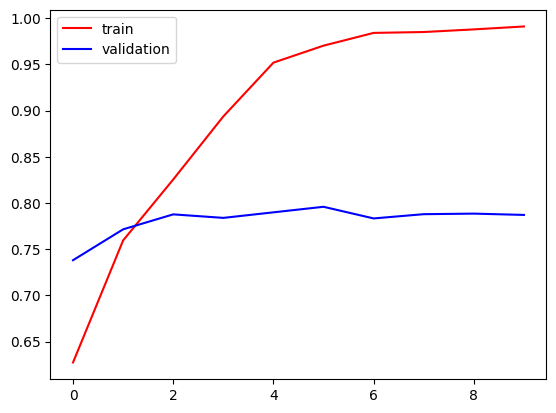

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()

In [13]:
#we can see that it is getting overfit


In [15]:
#ways to reduce to overfitting

# Add more data
#Data Augmentation
#L1/L2 regularization
#Droupout
#Batch Normalization
#Reduc complexity

In [30]:
import matplotlib.pyplot as plt

plt.plot(history1.history1['accuracy'],color='red',label='train')
plt.plot(history1.history1['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()

AttributeError: 'History' object has no attribute 'history1'